

##  Python Data Visualization with matplotlib and Pandas

---


## Learning Objectives

- **Practice** using different types of plots.
- **Use** Pandas methods for plotting.
- **Create** line plots, bar plots, histograms, and boxplots.
- **Know** when to use Seaborn or advanced Matplotlib

### Introduction

We shall see how plotting works in Pandas and Matplotlib. It is important to know that Pandas uses Matplotlib behind the scenes to make plots. So, you will notice that Pandas plotting methods often use similar parameter names as Matplotlib methods. Further, you can use Matplotlib functions in combination with Pandas methods to alter the plots after drawing them. For example, you can use Matplotlib's `xlabel` and `title` functions to label the plot's x-axis and title, respectively, after it is drawn.


Toward the end of the lab, we will use Seaborn, a popular statistics plotting library, as well as go more in-depth about how Matplotlib works.

[Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

### Pandas Plotting Documentation

[Link to Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

In [1]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Create fake data for examples.

In [2]:
df = pd.DataFrame(np.random.randn(10, 4), 
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

df.head()

,col1,col2,col3,col4
a,-0.554750,0.455516,-0.578491,-1.598087
b,-0.517295,0.429723,0.048986,0.080780
c,0.169967,1.769748,1.539307,0.931000
d,0.846406,-2.039000,-1.156237,-1.281037
e,0.479454,0.107779,1.096763,0.395257


### Choosing the right type of visualization

The choice of visualization should depend what you are trying to show. Here is a helpful flowchart that you can use to determine the best type of visualizations.

![Chart Suggestions](../assets/images/chart_suggestions.png)

### Load in data sets for visualization examples.

The Boston data dictionary can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [9]:
# Read in the Boston housing data.
housing_csv = '../datasets/boston_housing_data.csv'
housing = pd.read_csv(housing_csv)

'''
Data description: 
The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:
----------------------------------------------------
crim: per capita crime rate by town.

zn: proportion of residential land zoned for lots over 25,000 sq.ft.

indus: proportion of non-retail business acres per town.

chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox: nitrogen oxides concentration (parts per 10 million).

rm: average number of rooms per dwelling.

age: proportion of owner-occupied units built prior to 1940.

dis: weighted mean of distances to five Boston employment centres.

rad: index of accessibility to radial highways.

tax: full-value property-tax rate per $10,000.

ptratio: pupil-teacher ratio by town.

black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat: lower status of the population (percent).

medv: median value of owner-occupied homes in $1000s.'''

'\nData description: \nThe Boston data frame has 506 rows and 14 columns.\n\nThis data frame contains the following columns:\n----------------------------------------------------\ncrim: per capita crime rate by town.\n\nzn: proportion of residential land zoned for lots over 25,000 sq.ft.\n\nindus: proportion of non-retail business acres per town.\n\nchas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).\n\nnox: nitrogen oxides concentration (parts per 10 million).\n\nrm: average number of rooms per dwelling.\n\nage: proportion of owner-occupied units built prior to 1940.\n\ndis: weighted mean of distances to five Boston employment centres.\n\nrad: index of accessibility to radial highways.\n\ntax: full-value property-tax rate per $10,000.\n\nptratio: pupil-teacher ratio by town.\n\nblack: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.\n\nlstat: lower status of the population (percent).\n\nmedv: median value of owner-occupied homes in $1000s.'

In [5]:
# Read in the drinks data.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = '../datasets/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)


'''
country

beer_servings

spirit_servings

wine_servings

total_litres_of_pure_alcohol
 
continent
'''

'\ncountry\n\nbeer_servings\n\nspirit_servings\n\nwine_servings\n\ntotal_litres_of_pure_alcohol\n \ncontinent\n'

In [6]:
# Read in the ufo data.
ufo = pd.read_csv('../datasets/ufo.csv')
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year


'''
datetime: Contains date and time of sighting

city: City in which UFO was sighted

state: State in which UFO was sighted

country: Country of Sighting

shape: Shape of the UFO

duration: (seconds)Duration of the Sighting in seconds

duration: (hours/min)Duration of the sighting in hours and min

comments: Sighting description

date posted: Posted date of the sighting

latitude: Latitude coordinate of the sighting

longitude: Longitude coordinate of the sighting
'''

'\ndatetime: Contains date and time of sighting\n\ncity: City in which UFO was sighted\n\nstate: State in which UFO was sighted\n\ncountry: Country of Sighting\n\nshape: Shape of the UFO\n\nduration: (seconds)Duration of the Sighting in seconds\n\nduration: (hours/min)Duration of the sighting in hours and min\n\ncomments: Sighting description\n\ndate posted: Posted date of the sighting\n\nlatitude: Latitude coordinate of the sighting\n\nlongitude: Longitude coordinate of the sighting\n'

Try to describe above datasets and see if you can identify any trends, groups or relationship with data elements by using simple statistical means. 

<a id="line-plots"></a>
## Line plots: Show the trend of a numerical variable over time
---

- **Objective:** **Use** Pandas methods for plotting.
- **Objective:** **Create** line plots, bar plots, histograms, and box plots.

Let's Count the number of ufo reports each year (and sort by year).

In [7]:
# Count the number of ufo reports each year (and sort by year).
print(ufo.Year.value_counts().sort_index().head())
print('')
print(ufo.Year.value_counts().sort_index().tail())

1930    2
1931    2
1933    1
1934    1
1935    1
Name: Year, dtype: int64

2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, dtype: int64


This results as a Pandas "Series". Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the "index".

In [10]:
type(ufo.Year.value_counts())

pandas.core.series.Series

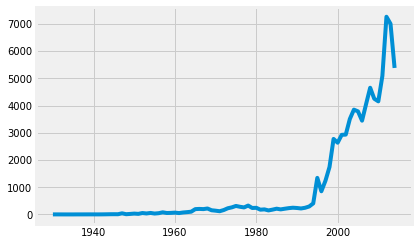

In [14]:
# Compare with line plot -- UFO sightings by year. (Ordering by year makes sense.)
ufo.Year.value_counts().sort_index().plot();

You should not use a line plot when the x-axis cannot be ordered sensically!

For example, ordering by continent below shows a trend where no exists, it would be just as valid to plot the continents in any order. A line plot is the wrong type of plot for this data. Any set of countries can be rearranged misleadingly to illustrate a negative trend, as we did here. Due to this, it would be more appropriate to represent this data using a bar plot, which does not imply a trend based on order.

### Always think about what you're plotting and if it makes sense.

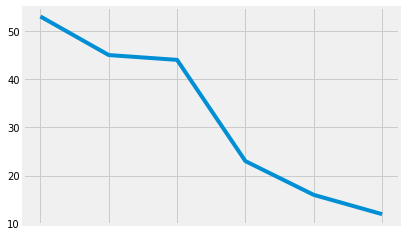

In [16]:
drinks.continent.value_counts().plot();

Let's plot the same data as a (horizontal) bar plot -- a much better choice!

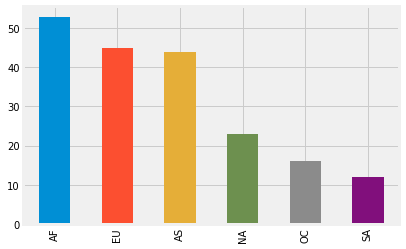

In [17]:
drinks.continent.value_counts().plot(kind='bar');

### Line Plot With a `DataFrame`
`DataFrame.plot()` , by default, plots a line graph for all the numerical values found in a dataset, even it doesnt make any sense. 

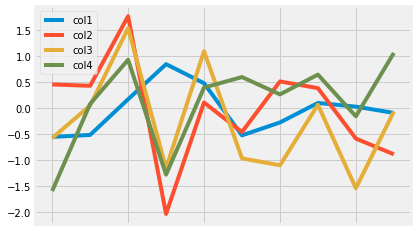

In [18]:
df.plot();

### How to change the size of a plot
Technically the figsize is 15 "inches" (width) by 8 "inches" (height)
The figure is specified in inches for printing -- you set a dpi (dots/pixels per inch) etc. if required.

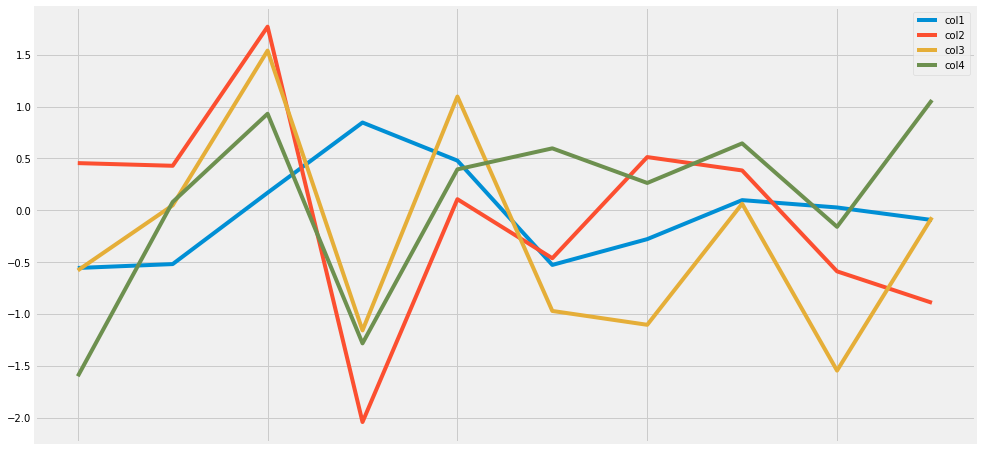

In [20]:
# Try changing the size below and monitor the effect on visualization
df.plot(figsize=(15,8)); # width, height

### How to change the color, width of a line in line plot
[Colour Picker](https://www.w3schools.com/colors/colors_picker.asp)

Use hexademical values for selecting the colour. `linewidth` argument can be used to specify the width of a line.

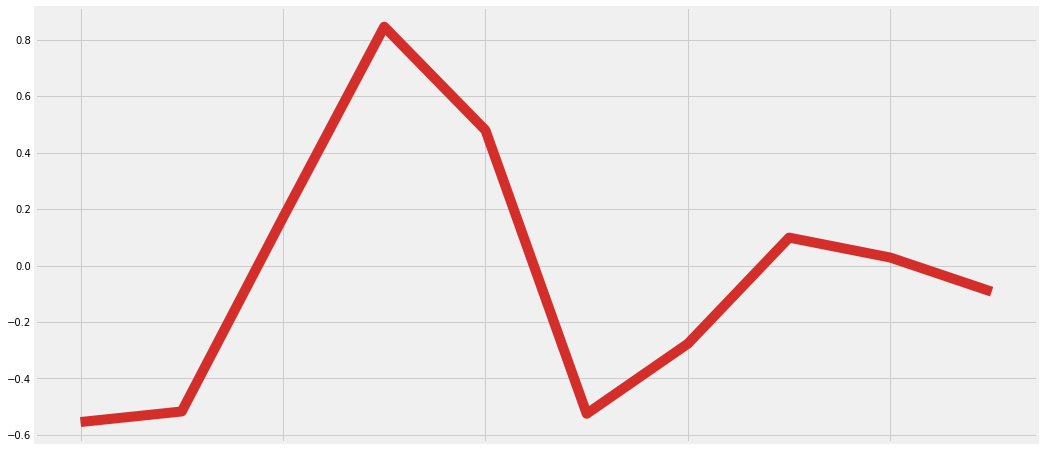

In [26]:
df['col1'].plot(color='#D42E2B', linewidth=10, figsize=(16,8));

### How to change the style of individual lines


    character description
    '-'       solid line style
    '--'      dashed line style
    '-.'      dash-dot line style
    ':'       dotted line style
    '.'       point marker
    ','       pixel marker
    'o'       circle marker
    'v'       triangle_down marker
    '^'       triangle_up marker
    '<'       triangle_left marker
    '>'       triangle_right marker
    '1'       tri_down marker
    '2'       tri_up marker
    '3'       tri_left marker
    '4'       tri_right marker
    's'       square marker
    'p'       pentagon marker
    '*'       star marker
    'h'       hexagon1 marker
    'H'       hexagon2 marker
    '+'       plus marker
    'x'       x marker
    'D'       diamond marker
    'd'       thin_diamond marker
    '|'       vline marker
    '_'       hline marker
 

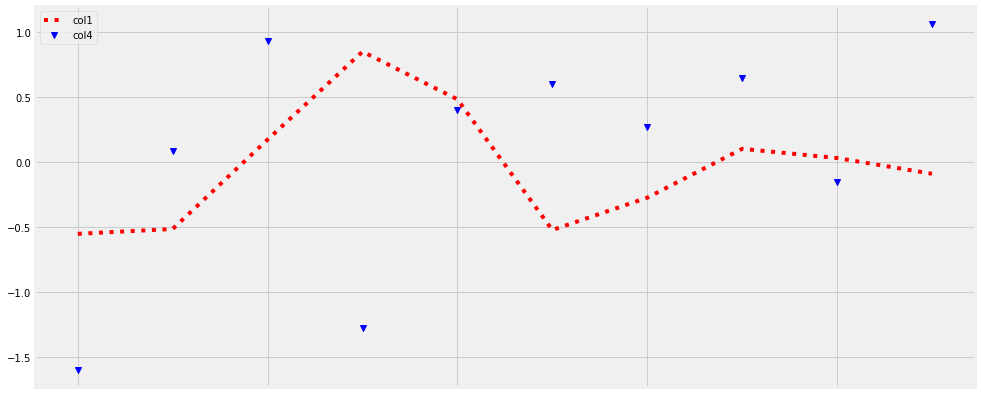

In [30]:
# : - dotted line, v - triangle_down
# r - red, b - blue
df[['col1', 'col4']].plot(figsize=(15,7), style={'col1': ':r', 'col4': 'vb'});



Some documentation of available style parameters can be found [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)

### Challenge: Create a line plot of `ZN` and `INDUS` in the housing data. 

- For `ZN`, use a solid green line. For `INDUS`, use a blue dashed line.
- Change the figure size to a width of 12 and height of 8.
- Change the style sheet to something you find [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

In [31]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


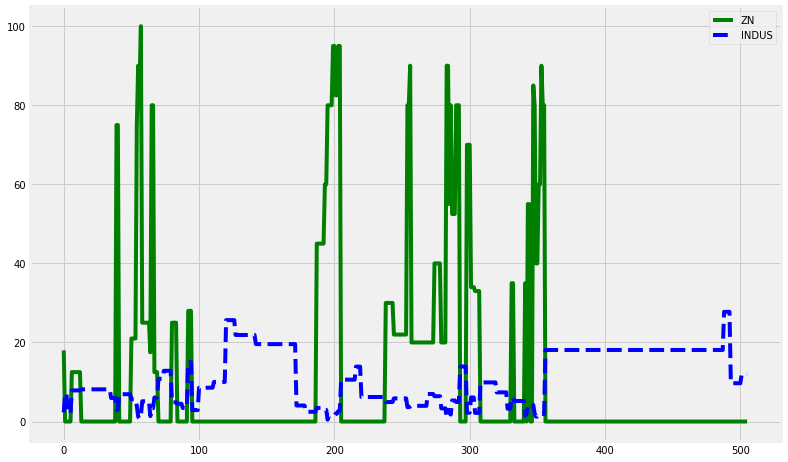

In [32]:
housing[['ZN', 'INDUS']].plot(kind='line', figsize=(12, 8),
                             style={'ZN': 'g-', 'INDUS': '--b'});

## Bar Plots: Show a numerical comparison across different categories



---
[groupby()](https://pandas.pydata.org/pandas-docs/stable/groupby.html) is used for splitting categorical data values and grouping them under a given variable. 

In [33]:
# Count the number of countries in each continent.
drinks.continent.value_counts().sort_index()

AF    53
AS    44
EU    45
NA    23
OC    16
SA    12
Name: continent, dtype: int64

Text(0.5,0,'Continents')

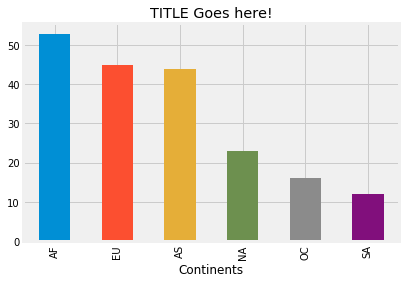

In [35]:
# Compare with bar plot.
drinks.continent.value_counts().plot(kind='bar');
plt.title("TITLE Goes here!")
plt.xlabel('Continents')

In [36]:
# Calculate the mean alcohol amounts for each continent.
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


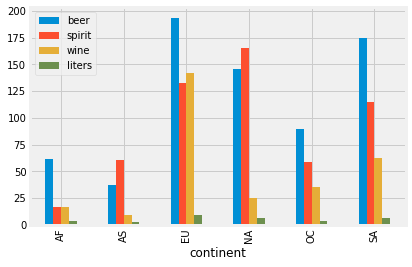

In [37]:
# Side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar');

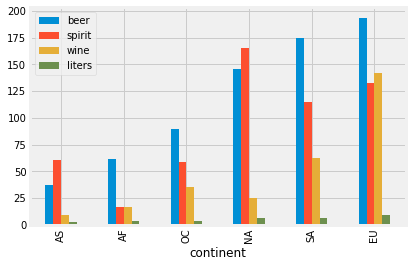

In [38]:
# Sort the continent x-axis by a particular column.
drinks.groupby('continent').mean().sort_values('beer').plot(kind='bar');

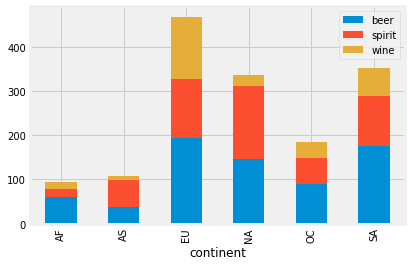

In [39]:
# Stacked bar plot (with the liters comparison removed!)
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True);

### Using a `DataFrame` and Matplotlib commands, we can get fancy.

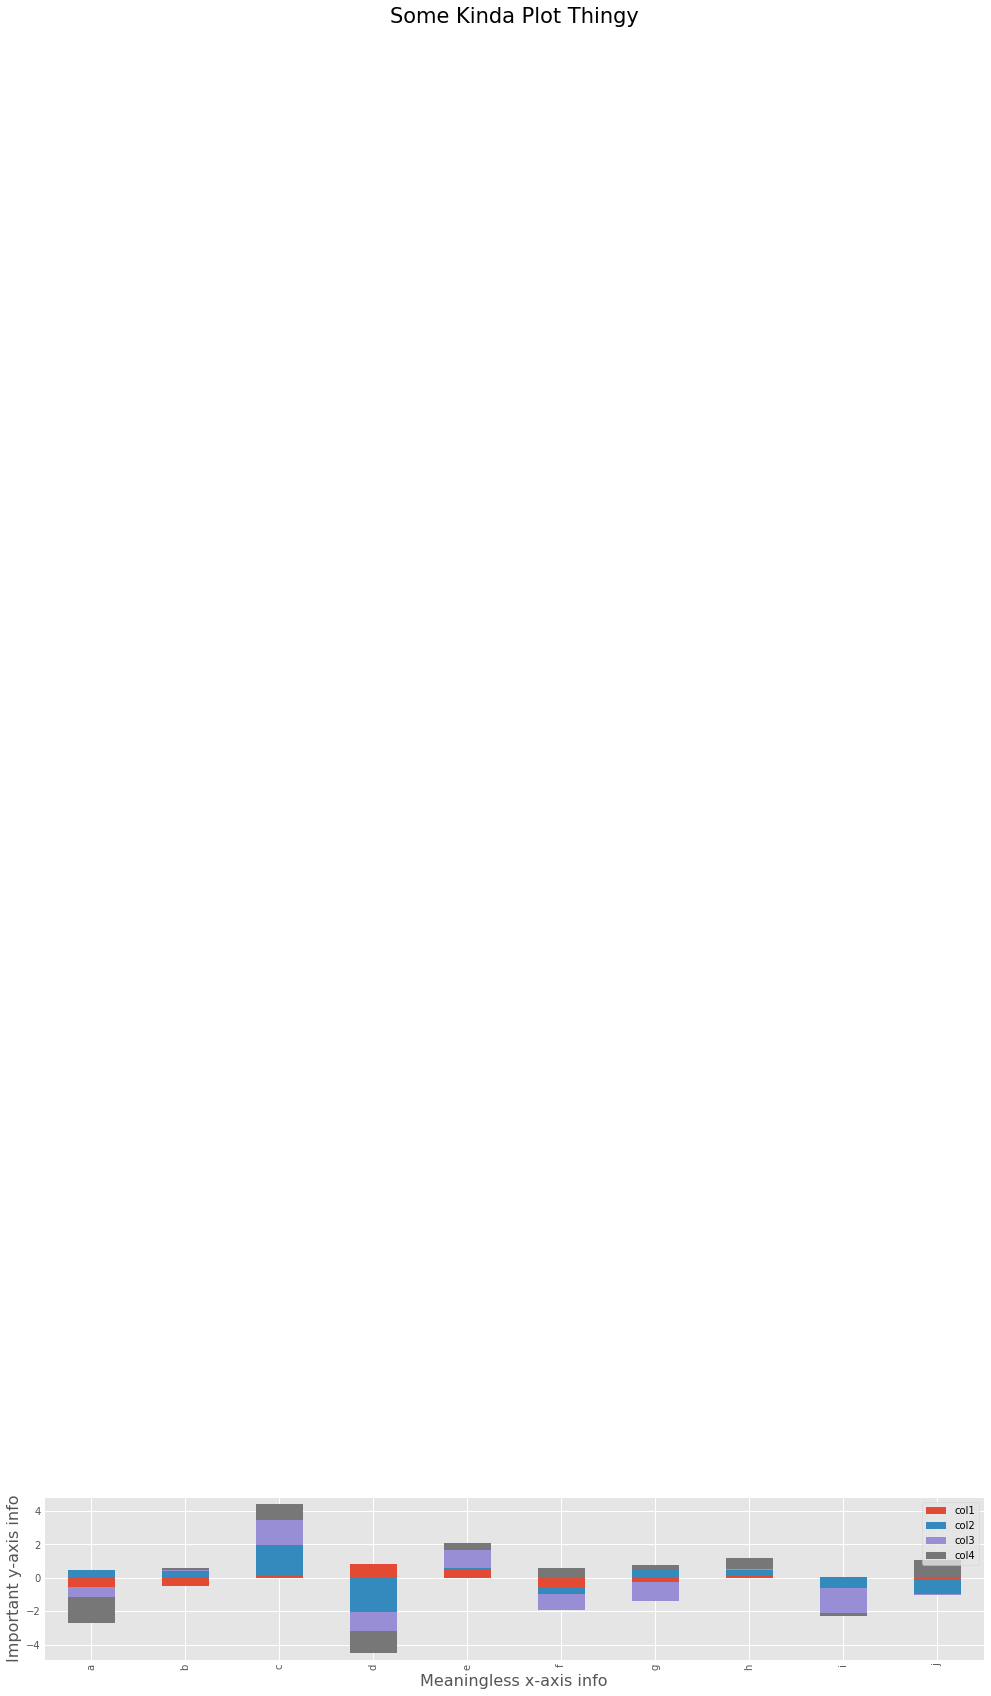

In [87]:
ax = df.plot(kind='bar', figsize=(15,3), stacked=True);

# Set the title.
ax.set_title('Some Kinda Plot Thingy', fontsize=21, );

# Move the legend.
ax.legend(loc=1);

# x-axis labels
ax.set_ylabel('Important y-axis info', fontsize=16);

# y-axis labels
ax.set_xlabel('Meaningless x-axis info', fontsize=16);

### Challenge: Create a bar chart using `col1` and `col2`.

- Give the plot a large title of your choosing. 
- Move the legend to the lower-left corner.

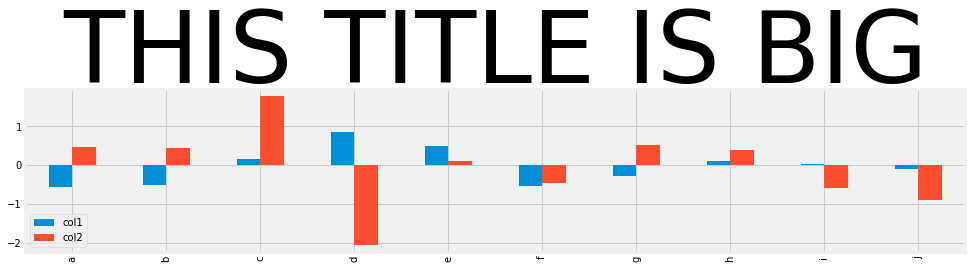

In [41]:
df[['col1', 'col2']].plot(kind='bar', figsize=(15, 3))
plt.title('THIS TITLE IS BIG', fontsize=100)
plt.legend(loc=3);

- Do the same thing but with horizontal bars.
- Move the legend to the upper-right corner.

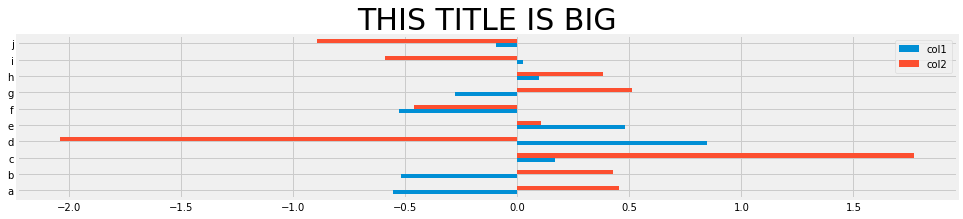

In [42]:
df[['col1', 'col2']].plot(kind='barh', figsize=(15, 3))
plt.title('THIS TITLE IS BIG', fontsize=30)
plt.legend(loc=1);

### Stacked works on horizontal bar charts.

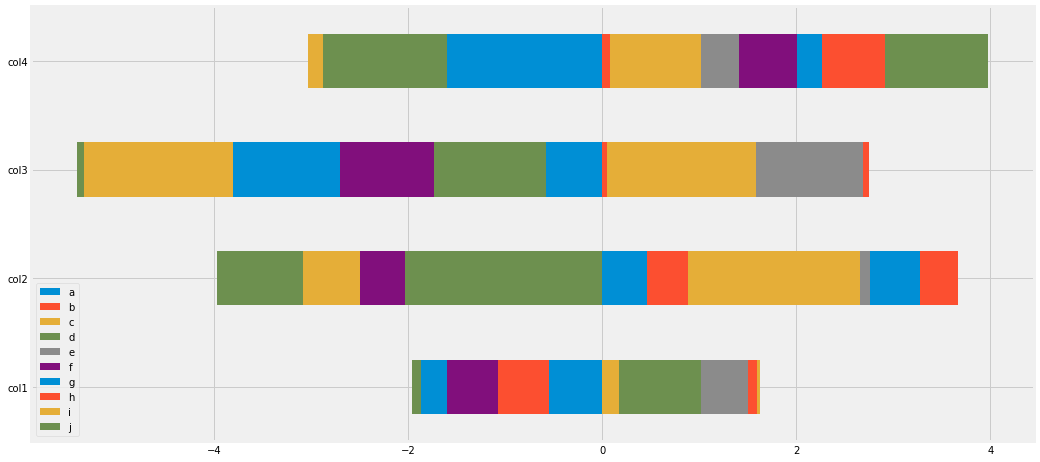

In [43]:
df.T.plot(kind='barh', stacked=True, figsize=(16,8));

<a id="histograms"></a>
## Histograms: Show the distribution of a numerical variable
---


In [44]:
# Sort the beer column and mentally split it into three groups.
drinks.beer.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   2,   3,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   8,   8,   8,   9,   9,   9,   9,  12,  13,
        15,  15,  16,  16,  17,  18,  19,  19,  20,  20,  21,  21,  21,
        21,  22,  23,  25,  25,  25,  25,  26,  28,  31,  31,  31,  31,
        32,  32,  34,  36,  36,  36,  37,  42,  42,  43,  44,  45,  47,
        49,  51,  51,  52,  52,  52,  53,  56,  56,  57,  58,  60,  62,
        62,  63,  64,  69,  71,  76,  76,  77,  77,  77,  78,  79,  82,
        82,  85,  88,  89,  90,  92,  93,  93,  98,  99, 102, 105, 106,
       109, 111, 115, 120, 122, 124, 127, 128, 130, 133, 140, 142, 143,
       144, 147, 149, 149, 152, 157, 159, 162, 163, 167, 169, 171, 173,
       185, 188, 192, 193, 193, 194, 194, 196, 197, 199, 203, 206, 213,
       217, 219, 224, 224, 225, 230, 231, 233, 234, 236, 238, 240, 245,
       245, 247, 249, 251, 261, 263, 263, 270, 279, 281, 283, 28

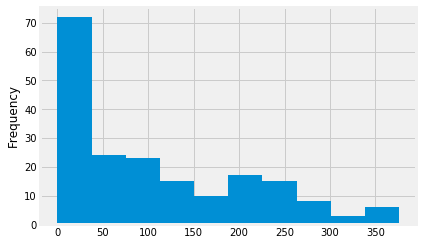

In [45]:
# Compare the above with histogram.
# About how many of the points above are in the groups 1-125, 125-250, and 250-376?
drinks.beer.plot(kind='hist');

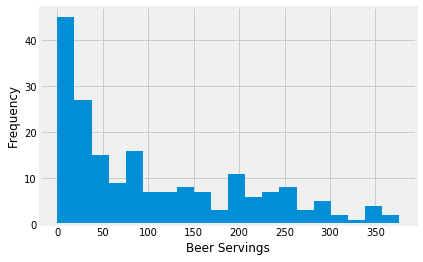

In [46]:
# Try more bins — it takes the range of the data and divides it into 20 evenly spaced bins.
drinks.beer.plot(kind='hist', bins=20);
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');

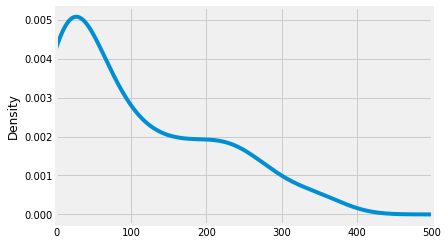

In [47]:
# Compare with density plot (smooth version of a histogram).
drinks.beer.plot(kind='density', xlim=(0, 500));

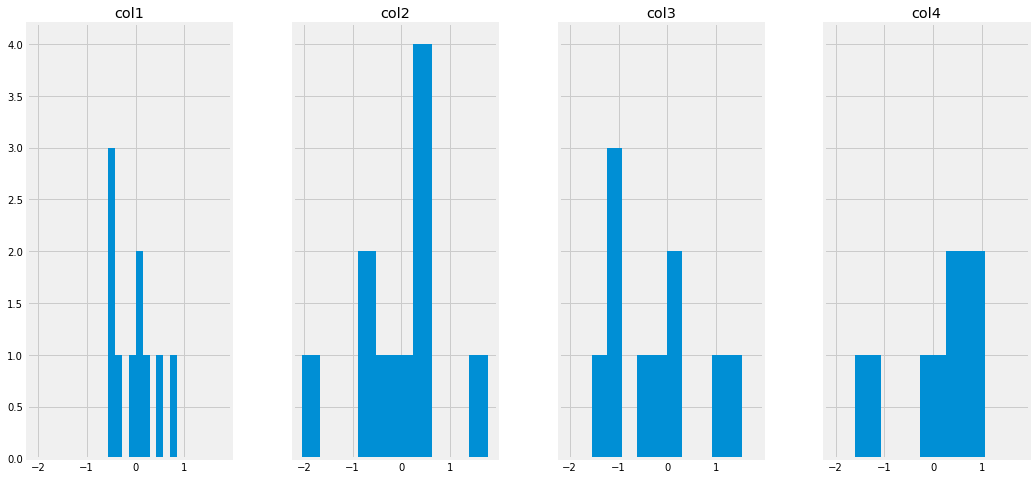

In [48]:
# Making histograms of DataFrames — histogram of random data
df.hist(figsize=(16,8), sharex=True, sharey=True, layout=(1, 4));

### Single Histogram

In [49]:
norm = np.random.standard_normal(5000)

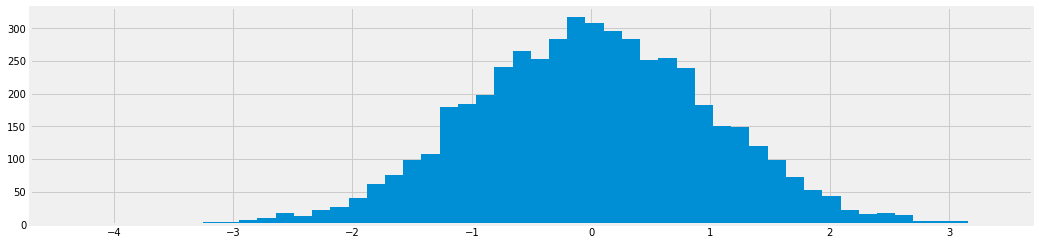

In [50]:
pd.Series(norm).hist(figsize=(16,4), bins=50);

### Another bins example: Sometimes the binning makes the data look different or misleading.

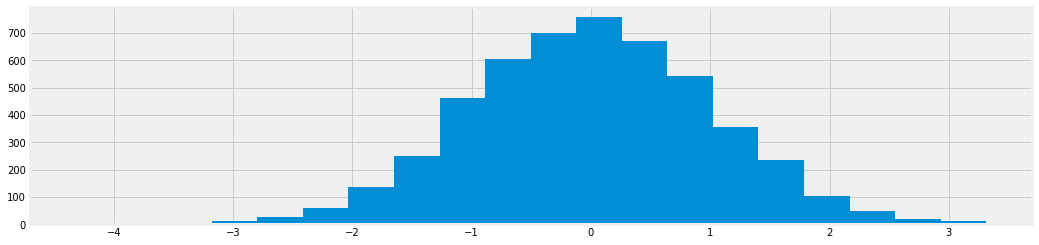

In [51]:
pd.Series(norm).hist(figsize=(16,4), bins=20);

### Challenge: Create a histogram with pandas for using `MEDV` in the housing data.
- Set the bins to 20.

In [52]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


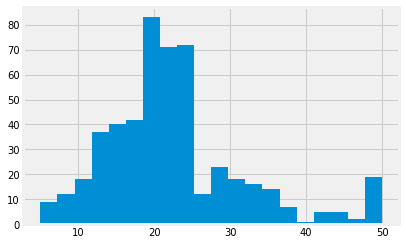

In [53]:
housing['MEDV'].hist(bins=20)

<a id="grouped-histograms"></a>
### Grouped histograms: Show one histogram for each group.

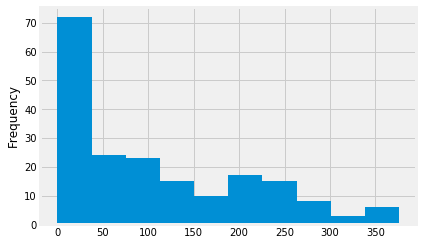

In [54]:
# Reminder: Overall histogram of beer servings
drinks.beer.plot(kind='hist');

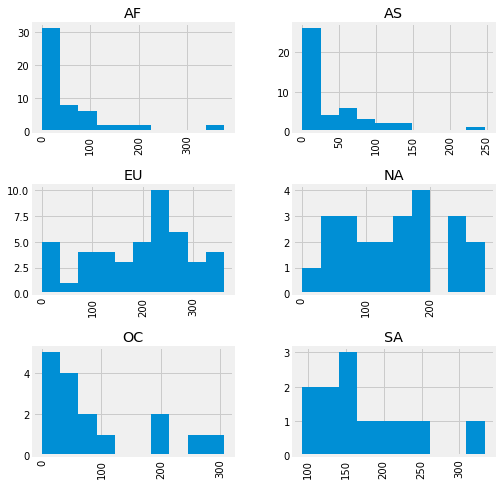

In [55]:
# Histogram of beer servings grouped by continent -- how might these graphs be misleading?
drinks.hist(column='beer', by='continent', figsize=(8, 8));

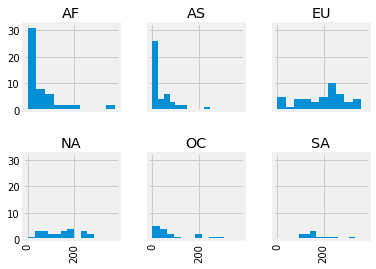

In [56]:
# Share the x- and y-axes.
drinks.hist(column='beer', by='continent', sharex=True, sharey=True, layout=(2, 3));

<a id="box-plots"></a>
## Box Plots: Show quartiles (and outliers) for one or more numerical variables
---

We can use boxplots to quickly summarize distributions.

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(It's more useful than mean and standard deviation for describing skewed distributions.)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

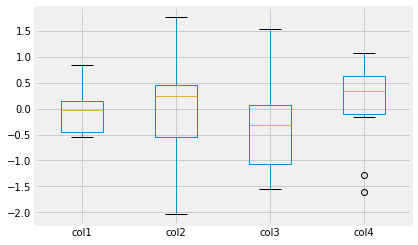

In [57]:
df.boxplot();

### Let's see how box plots are generated so we can best interpret them.

In [58]:
# Sort the spirit column.
drinks.spirit.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,   2,
         3,   3,   3,   3,   3,   3,   3,   3,   4,   4,   4,   5,   5,
         6,   6,   6,   7,   9,  11,  11,  12,  13,  15,  15,  16,  16,
        18,  18,  18,  18,  19,  21,  21,  22,  22,  25,  25,  27,  29,
        31,  31,  34,  35,  35,  35,  35,  38,  39,  41,  41,  42,  42,
        44,  46,  50,  51,  55,  56,  57,  60,  61,  63,  63,  65,  67,
        68,  69,  69,  69,  71,  71,  72,  74,  75,  76,  76,  79,  81,
        84,  87,  87,  88,  97,  97,  98,  98, 100, 100, 100, 100, 101,
       104, 104, 112, 114, 114, 114, 117, 117, 118, 118, 122, 122, 124,
       126, 128, 131, 132, 133, 133, 135, 137, 138, 145, 147, 151, 152,
       154, 156, 157, 158, 160, 170, 173, 173, 176, 178, 179, 186, 189,
       192, 194, 200, 202, 205, 215, 215, 216, 221, 226, 237, 24

In [59]:
# Show "five-number summary" for spirit.
drinks.spirit.describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

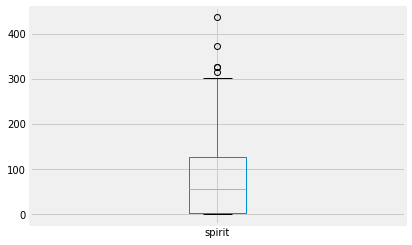

In [60]:
# Compare with box plot.
drinks.spirit.plot(kind='box');

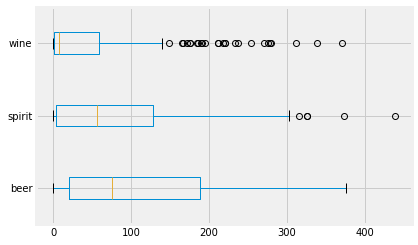

In [61]:
# Include multiple variables.
drinks.drop('liters', axis=1).plot(kind='box', vert=False);

### How to use a box plot to preview the distributions in the housing data

In [62]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


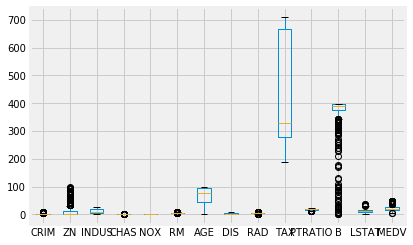

In [63]:
housing.boxplot();

<a id="grouped-box-plots"></a>
### Grouped box plots: Show one box plot for each group.

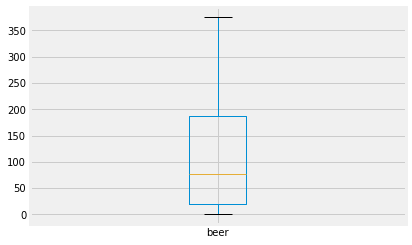

In [64]:
# Reminder: box plot of beer servings
drinks.beer.plot(kind='box');

Text(0.5,0.98,'')

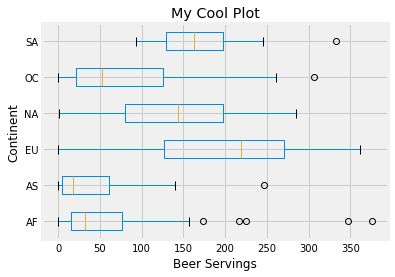

In [65]:
# Box plot of beer servings grouped by continent
drinks.boxplot(column='beer', by='continent', vert=False);
plt.xlabel("Beer Servings")
plt.ylabel("Continent")
plt.title("My Cool Plot")
plt.suptitle('')

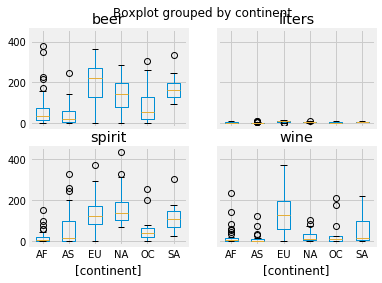

In [66]:
# Box plot of all numeric columns grouped by continent
drinks.boxplot(by='continent');

AF         AxesSubplot(0.1,0.679412;0.363636x0.220588)
AS    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
EU         AxesSubplot(0.1,0.414706;0.363636x0.220588)
NA    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
OC             AxesSubplot(0.1,0.15;0.363636x0.220588)
SA        AxesSubplot(0.536364,0.15;0.363636x0.220588)
dtype: object

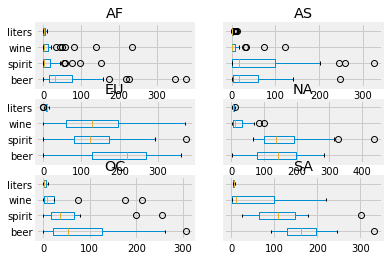

In [67]:
drinks.groupby('continent').boxplot(vert=False)

<a id="scatter-plots"></a>
## Scatter plots: Show the relationship between two numerical variables
---


In [68]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [69]:
# Select the beer and wine columns and sort by beer.
drinks[['beer', 'wine']].sort_values('beer').values

array([[  0,   0],
       [  0,  74],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  1,   7],
       [  1,   1],
       [  1,   4],
       [  1,   1],
       [  2,   0],
       [  3,   1],
       [  5,   0],
       [  5,   0],
       [  5,  16],
       [  5,   1],
       [  5,   0],
       [  6,   1],
       [  6,   0],
       [  6,   1],
       [  6,   9],
       [  8,   0],
       [  8,   1],
       [  8,   1],
       [  9,   2],
       [  9,   0],
       [  9,   7],
       [  9,   0],
       [ 12,  10],
       [ 13,   0],
       [ 15,   3],
       [ 15,   1],
       [ 16,   5],
       [ 16,   0],
       [ 17,   1],
       [ 18,   0],
       [ 19,  32],
       [ 19,   2],
       [ 20,   0],
       [ 20,  31],
       [ 21,  11],
       [ 21,  11],
       [ 21,   5],
       [ 21,

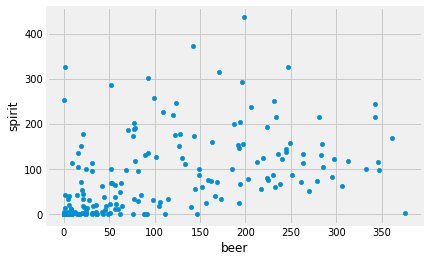

In [70]:
# Compare with scatter plot.
drinks.plot(kind='scatter', x='beer', y='spirit');

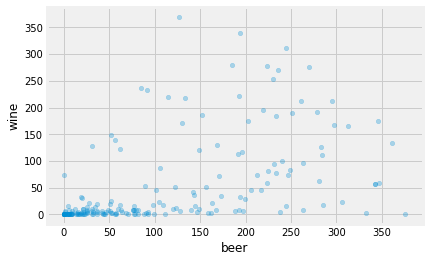

In [71]:
# Add transparency (great for plotting several graphs on top of each other, or for illustrating density!).
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.3);

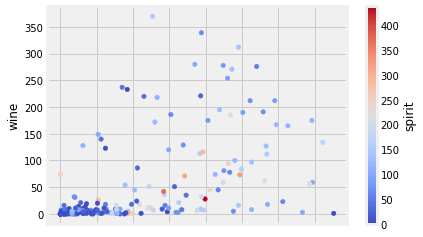

In [72]:
# Vary point color by spirit servings.
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='coolwarm');

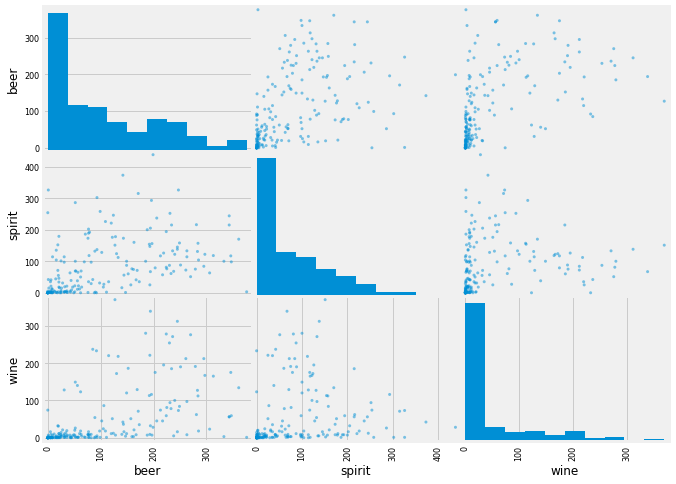

In [73]:
# Scatter matrix of three numerical columns
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(10, 8));

### Plotting `DataFrames`

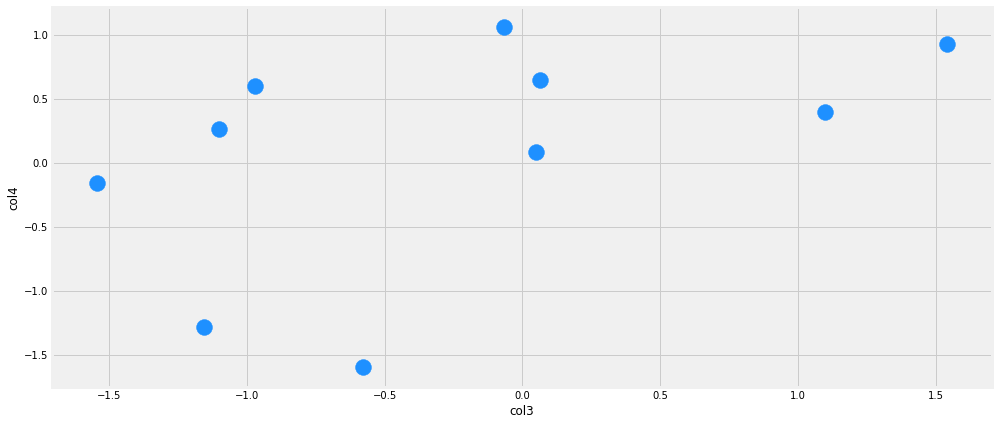

In [74]:
df.plot(x='col3', y='col4', kind='scatter', color='dodgerblue',
        figsize=(15,7), s=250);

### How to view the association between the variables `ZN` and `INDUS` using a scatter plot

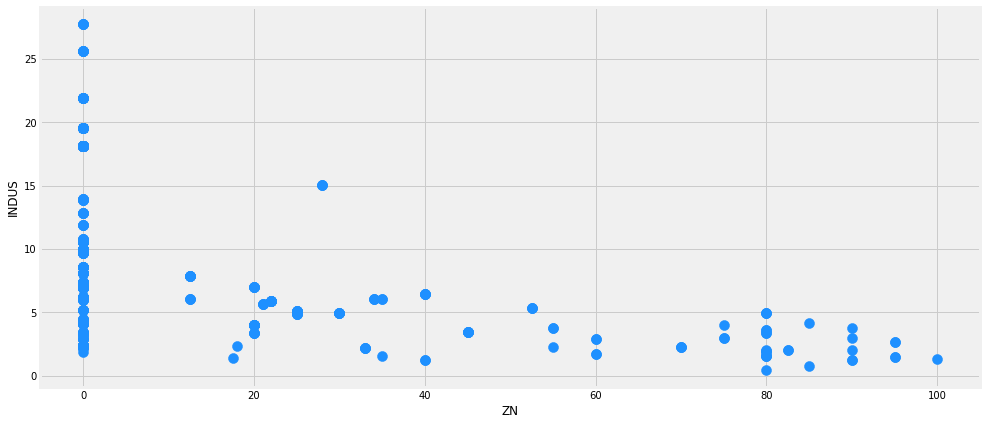

In [75]:
housing.plot(x='ZN', y='INDUS', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=100);

### How to use a list comprehension to change the size of the scatter plot dots based on `DIS`

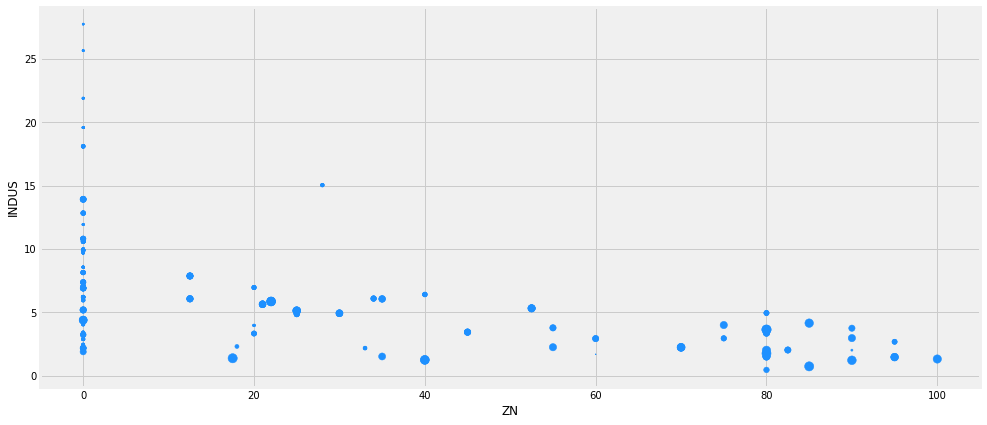

In [76]:
# This list comprehension sets the point sizes ('s') to be the squares of the values in housing['DIS']
housing.plot(x='ZN', y='INDUS', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=housing['DIS']**2);

<a id="seaborn"></a>
## Seaborn `pairplot`

---

- **Objective:** Know when to use Seaborn or advanced Matplotlib.

With the `DataFrame` object `housing`, we will render a pairplot using the Seaborn library.
What do each of the elements represent? Is this more or less useful than the previous plot?

In [ ]:
sns.pairplot(housing);

**Answer:** _What do each of the elements represent?  Is this more or less useful than the previous plot?_
> In a pair plot we get to see every relationship between every _pair_ of variables.  We can see this is very useful for quickly discovering which variables have some kind of correlation during an exploratory data analysis.  However, when just looking at the `INDUS` feature, the pair plot is more difficult to read and interpret as opposed to the single histogram.  

## Seaborn `heatmap`
---

When you have too many variables, a pairplot or scatter matrix can become impossible to read. We can still gauge linear correlation using a heatmap of the correlation matrix.

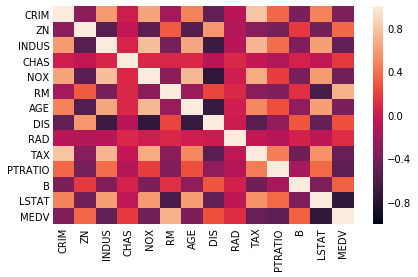

In [77]:
# Make a heatmap on the correlations between variables in the housing data:
housing_correlations = housing.corr();
sns.heatmap(housing_correlations, vmin=-1);

### Challenge: Create a scatter plot of two heatmap entries that appear to have a very positive correlation.

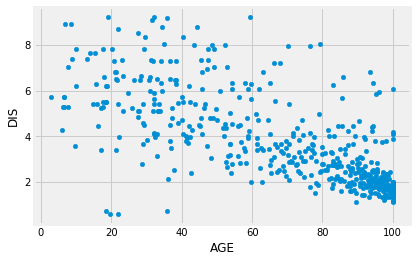

In [78]:
housing.plot(kind='scatter', x='AGE', y='DIS')

In [79]:
housing[['AGE', 'DIS']].corr()

,AGE,DIS
AGE,1.000000,-0.713313
DIS,-0.713313,1.000000


- Now, create a scatter plot of two heatmap entries that appear to have negative correlation.

<a id="matplotlib"></a>
## OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)

---

Matplotlib uses a blank canvas called a figure.

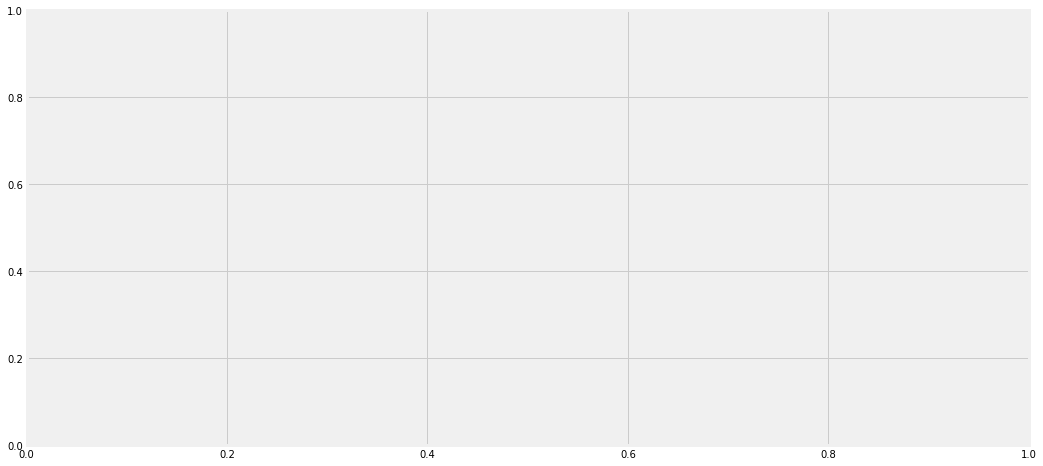

In [80]:
fig = plt.subplots(1,1, figsize=(16,8));

Within this canvas, we can contain smaller objects called axes.

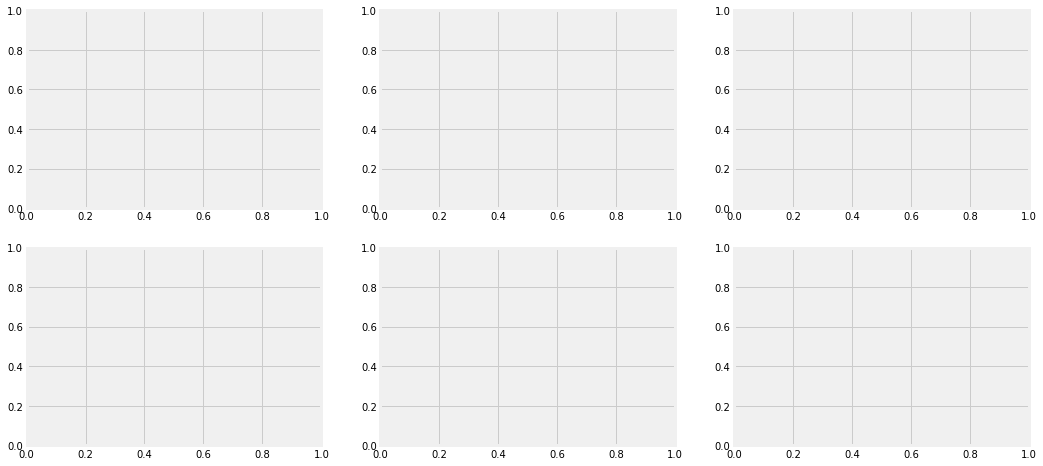

In [81]:
fig, axes = plt.subplots(2,3, figsize=(16,8));

Pandas allows us to plot to a specified axes if we pass the object to the ax parameter.

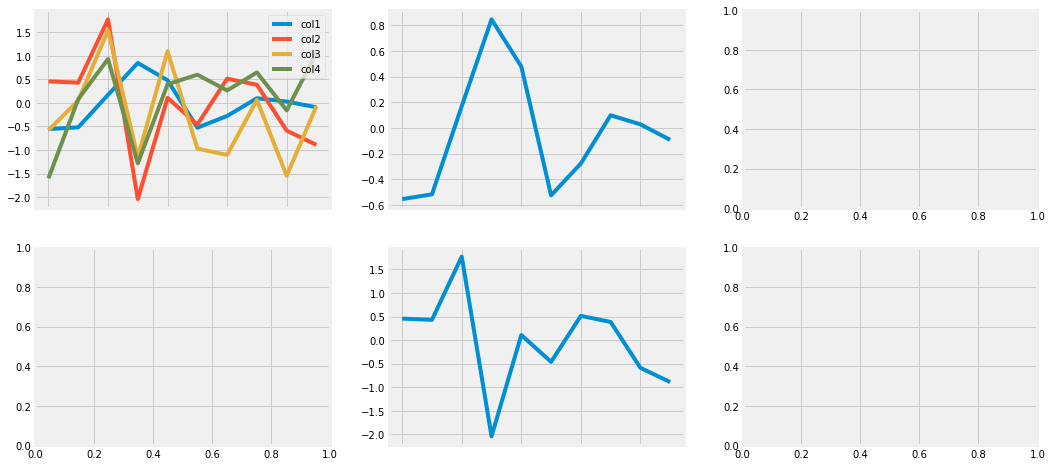

In [82]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
df.plot(ax=axes[0][0]);
df['col1'].plot(ax=axes[0][1]);
df['col2'].plot(ax=axes[1][1]);

## Let's use a bit more customization.
---

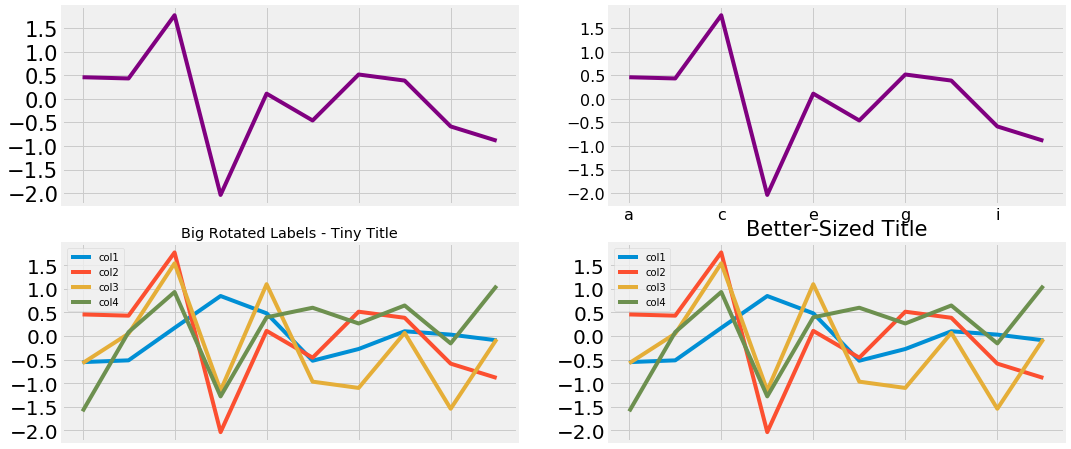

In [83]:
fig, axes = plt.subplots(2,2, figsize=(16,8))

# We can change the ticks' size.
df['col2'].plot(figsize=(16,4), color='purple', fontsize=21, ax=axes[0][0])

# We can also change which ticks are visible.
# Let's show only the even ticks. ('idx % 2 == 0' only if 'idx' is even.)
ticks_to_show = [idx for idx, _ in enumerate(df['col2'].index) if idx % 2 == 0]
df['col2'].plot(figsize=(16,4), color='purple', xticks=ticks_to_show, fontsize=16, ax=axes[0][1])

# We can change the label rotation.
df.plot(figsize=(15,7), title='Big Rotated Labels - Tiny Title',\
        fontsize=20, rot=-50, ax=axes[1][0])\

# We have to use ".set_title()" to fix title size.
df.plot(figsize=(16,8), fontsize=20, rot=-50, ax=axes[1][1])\
       .set_title('Better-Sized Title', fontsize=21, y=1.01);

<a id="additional-topics"></a>
## OPTIONAL: Additional Topics

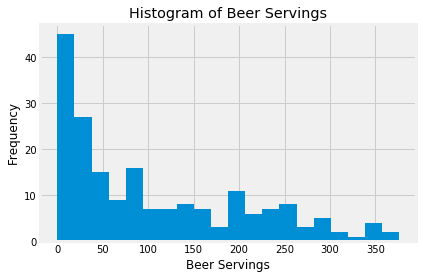

In [84]:
# Saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings');
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');
plt.savefig('beer_histogram.png');    # Save to file!

In [85]:
# List available plot styles
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [86]:
# Change to a different style.
plt.style.use('ggplot')

<a id="summary"></a>
### Summary

In this lesson, we showed examples how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

Do not be concerned if you do not remember everything — this will come with practice! Although there are many plot styles, many similarities exist between how each plot is drawn. For example, they have most parameters in common, and the same Matplotlib functions are used to modify the plot area.

We looked at:
- Line plots
- Bar plots
- Histograms
- Box plots
- Special seaborn plots
- How Matplotlib works